In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)

import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [ ]:

DF = pd.read_csv('World Energy Consumption.csv')

DF=DF[['country','year','coal_production','electricity_generation','biofuel_electricity','coal_electricity','fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity','renewables_electricity','oil_production','population','gdp','solar_electricity','wind_electricity','energy_per_gdp','energy_per_capita','fossil_share_elec','gas_share_elec','gas_production','low_carbon_share_elec']]

DF=DF[DF['year']>=1990]

Countries=['Egypt','Saudi Arabia','United Kingdom','France','Germany','United States','Japan','India']

DF=DF.loc[DF['country'].isin(Countries)]

DF.head(3)

,country,year,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,...,population,gdp,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_share_elec,gas_share_elec,gas_production,low_carbon_share_elec
4951,Egypt,1990,NaN,41.952,NaN,0.0,32.000,16.446,9.953,0.0,...,56134000.0,2.530000e+11,0.0,0.0,1.560,7031.142,76.276,39.201,77.674,23.724
4952,Egypt,1991,NaN,43.276,NaN,0.0,33.360,20.406,9.916,0.0,...,57425000.0,2.610000e+11,0.0,0.0,1.532,6962.011,77.087,47.154,87.395,22.913
4953,Egypt,1992,NaN,44.987,NaN,0.0,35.187,22.944,9.800,0.0,...,58667000.0,2.690000e+11,0.0,0.0,1.484,6805.716,78.216,51.003,94.518,21.784


In [ ]:
nulls=DF.isna().sum()
nulls

country                    0
year                       0
coal_production           96
electricity_generation     0
biofuel_electricity       80
coal_electricity          10
fossil_electricity        10
gas_electricity           10
hydro_electricity          0
nuclear_electricity        0
oil_electricity           10
renewables_electricity     0
oil_production            96
population                 6
gdp                       30
solar_electricity          0
wind_electricity           0
energy_per_gdp            30
energy_per_capita          6
fossil_share_elec         10
gas_share_elec            10
gas_production            66
low_carbon_share_elec      0
dtype: int64

In [ ]:
nulls=DF.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        DF[i].ffill(inplace=True)
        DF[i].bfill(inplace=True)
DF.isna().sum()

country                   0
year                      0
coal_production           0
electricity_generation    0
biofuel_electricity       0
coal_electricity          0
fossil_electricity        0
gas_electricity           0
hydro_electricity         0
nuclear_electricity       0
oil_electricity           0
renewables_electricity    0
oil_production            0
population                0
gdp                       0
solar_electricity         0
wind_electricity          0
energy_per_gdp            0
energy_per_capita         0
fossil_share_elec         0
gas_share_elec            0
gas_production            0
low_carbon_share_elec     0
dtype: int64

Comparaison du PIB de certains pays

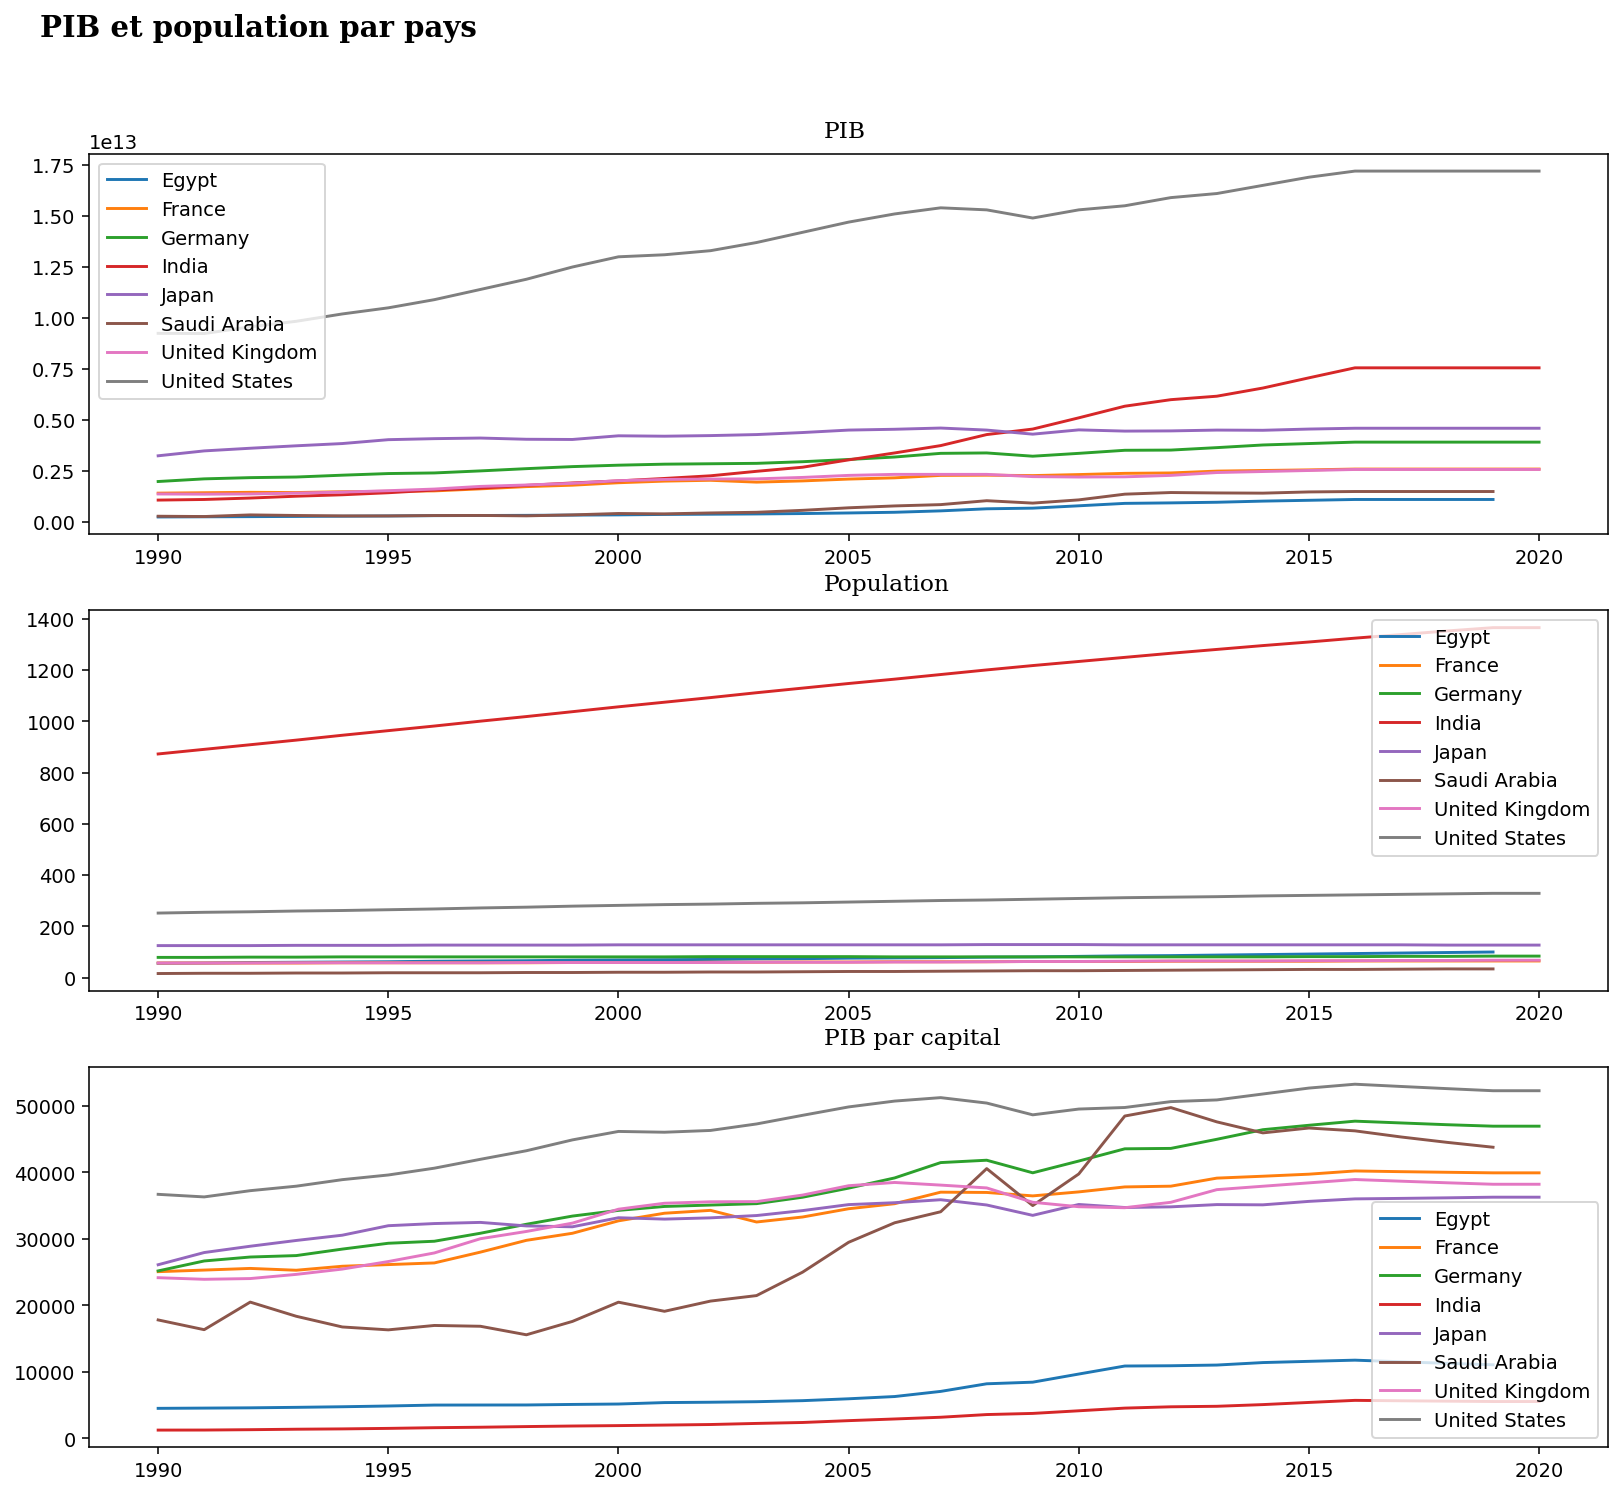

In [ ]:
DF_gdp=DF.groupby(['year','country'])['gdp'].sum().unstack('country')
DF_pop=DF.groupby(['year','country'])['population'].sum().unstack('country')
DF_pop_mil=round(DF_pop/1000000)
DF['gdp_per_capita']=round(DF['gdp']/DF['population'])
DF_gdp_per_capita=DF.groupby(['year','country'])['gdp_per_capita'].sum().unstack('country')
fig, ax = plt.subplots(3, 1, figsize=(14, 12))
ax[0].plot(DF_gdp,label=DF_gdp.columns)
ax[0].legend()
ax[1].plot(DF_pop_mil,label=DF_pop_mil.columns)
ax[1].legend()
ax[2].plot(DF_gdp_per_capita,label=DF_gdp_per_capita.columns)
ax[2].legend()
fig.text(0.1, 0.95, 'PIB et population par pays', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.5, 0.89, 
'''PIB'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.62,
'''Population'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.35,
'''PIB par capital'''
, fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

USA

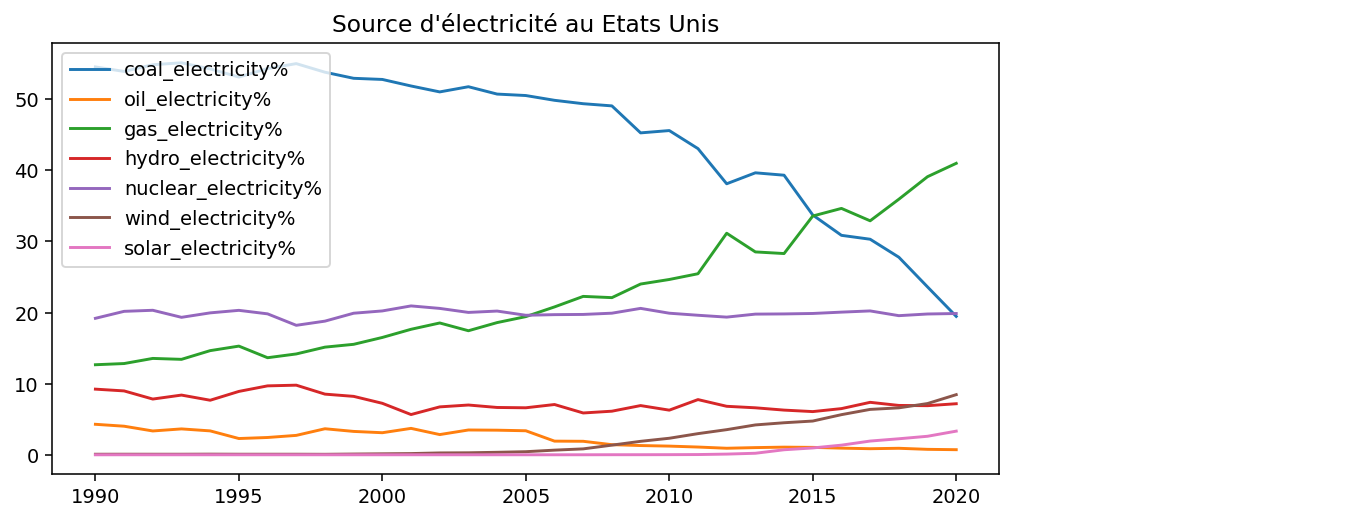

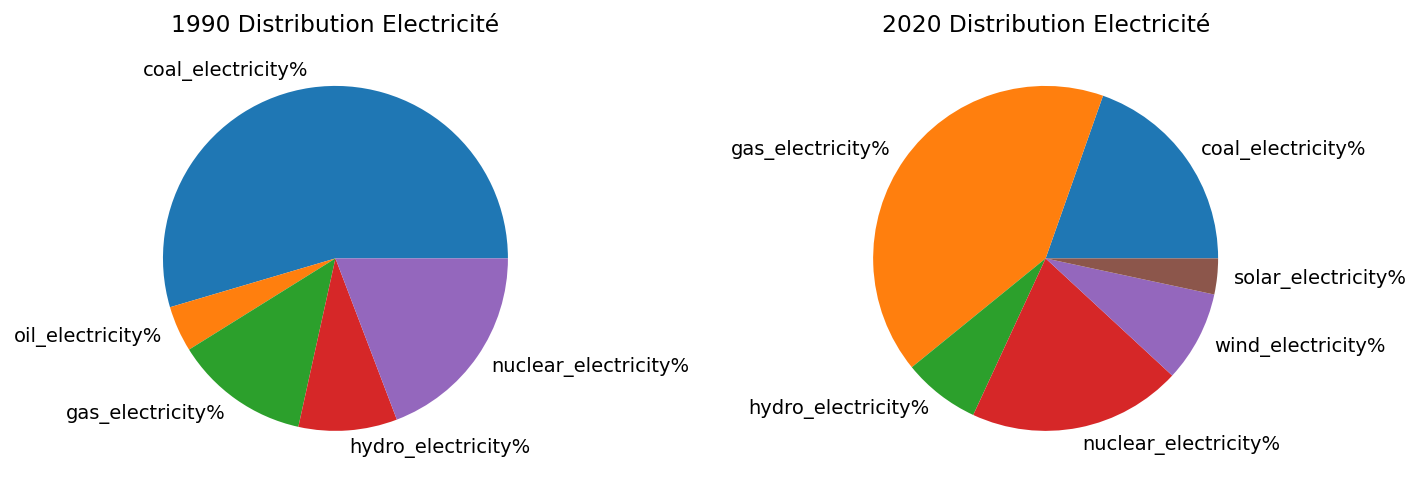

In [ ]:
Parse=['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
DF['total']=DF[Parse].sum(axis=1)
DF_Electricity=DF[['year','country']]
for i in Parse:
    DF_Electricity[f"{i}%"]=round(100*(DF[i]/DF['total']),4)

fig, ax = plt.subplots(1, 2, figsize=(12, 4),gridspec_kw={'width_ratios':[4,1]})
chart_DF=DF_Electricity[DF_Electricity['country']=='United States'].groupby('year').mean()
ax[0].plot(chart_DF,label=chart_DF.columns)
ax[0].set_title("Source d'électricité au Etats Unis")
ax[0].legend()
ax[1].axis('off')


years=[1990,2020]
count=0
fig2,ay =  plt.subplots(1, 2, figsize=(12, 4))
for y in years:
    chart_DF_pie_1=chart_DF[(chart_DF.index.values==y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i]<1:
            chart_DF_pie_1.drop(columns=[i],axis=1,inplace=True)
    ay[count].pie(chart_DF_pie_1.iloc[0].values,labels=chart_DF_pie_1.columns)
    ay[count].set_title(f"{int(y)} Distribution Electricité")
    count=count+1

plt.show()

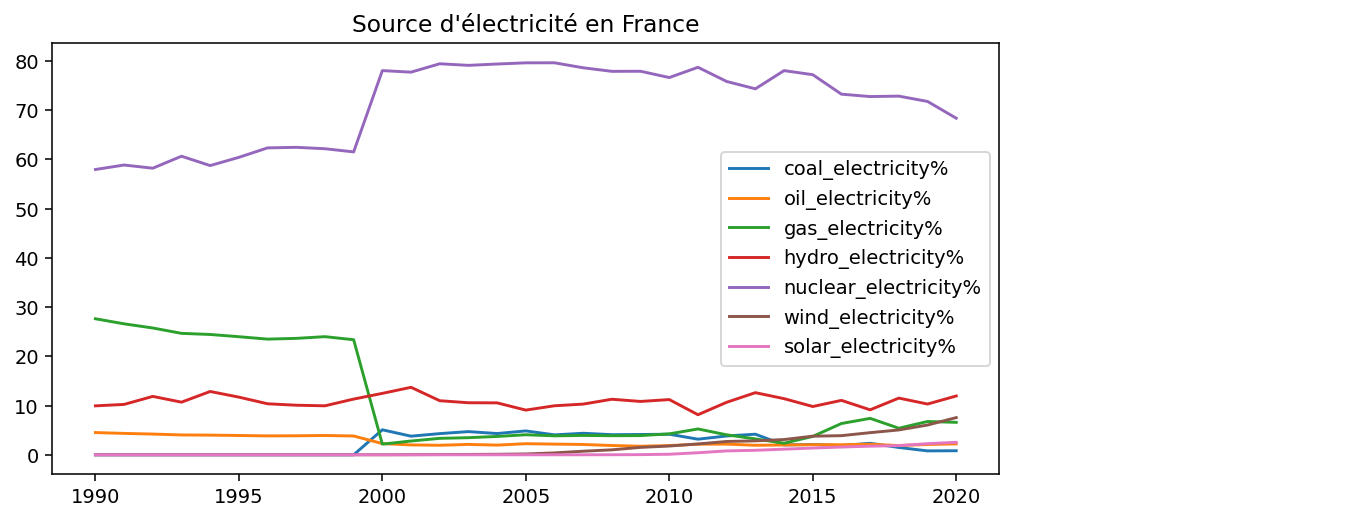

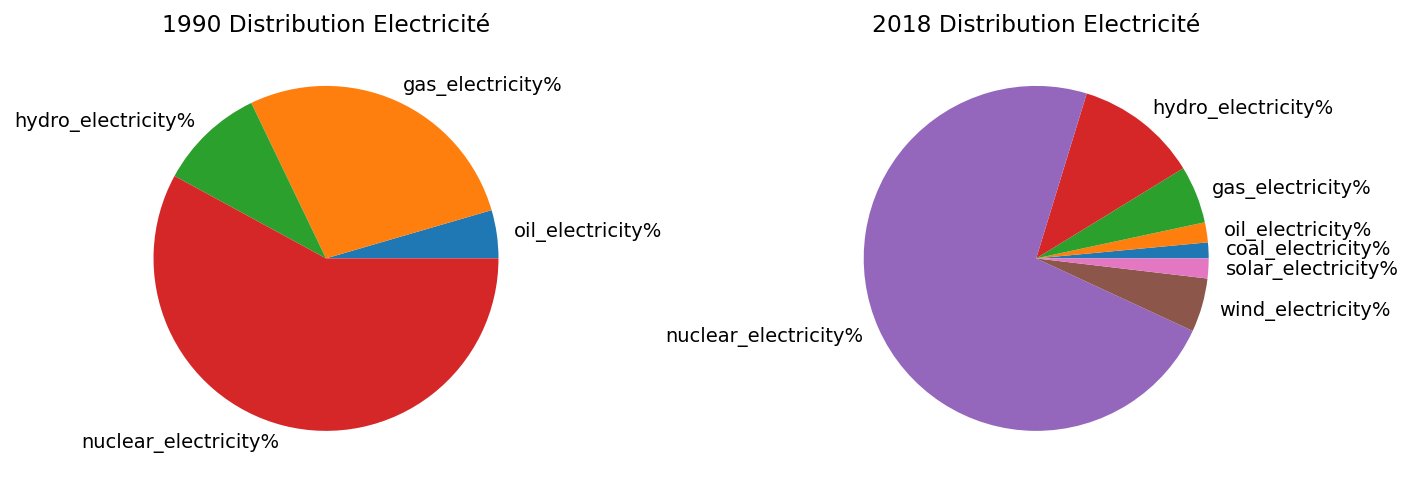

In [ ]:
Parse=['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
DF['total']=DF[Parse].sum(axis=1)
DF_Electricity=DF[['year','country']]
for i in Parse:
    DF_Electricity[f"{i}%"]=round(100*(DF[i]/DF['total']),4)

fig, ax = plt.subplots(1, 2, figsize=(12, 4),gridspec_kw={'width_ratios':[4,1]})
chart_DF=DF_Electricity[DF_Electricity['country']=='France'].groupby('year').mean()
ax[0].plot(chart_DF,label=chart_DF.columns)
ax[0].set_title("Source d'électricité en France")
ax[0].legend()
ax[1].axis('off')


years=[1990,2020]
count=0
fig2,ay =  plt.subplots(1, 2, figsize=(12, 4))
for y in years:
    chart_DF_pie_1=chart_DF[(chart_DF.index.values==y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i]<1:
            chart_DF_pie_1.drop(columns=[i],axis=1,inplace=True)
    ay[count].pie(chart_DF_pie_1.iloc[0].values,labels=chart_DF_pie_1.columns)
    ay[count].set_title(f"{int(y)} Distribution Electricité")
    count=count+1

plt.show()

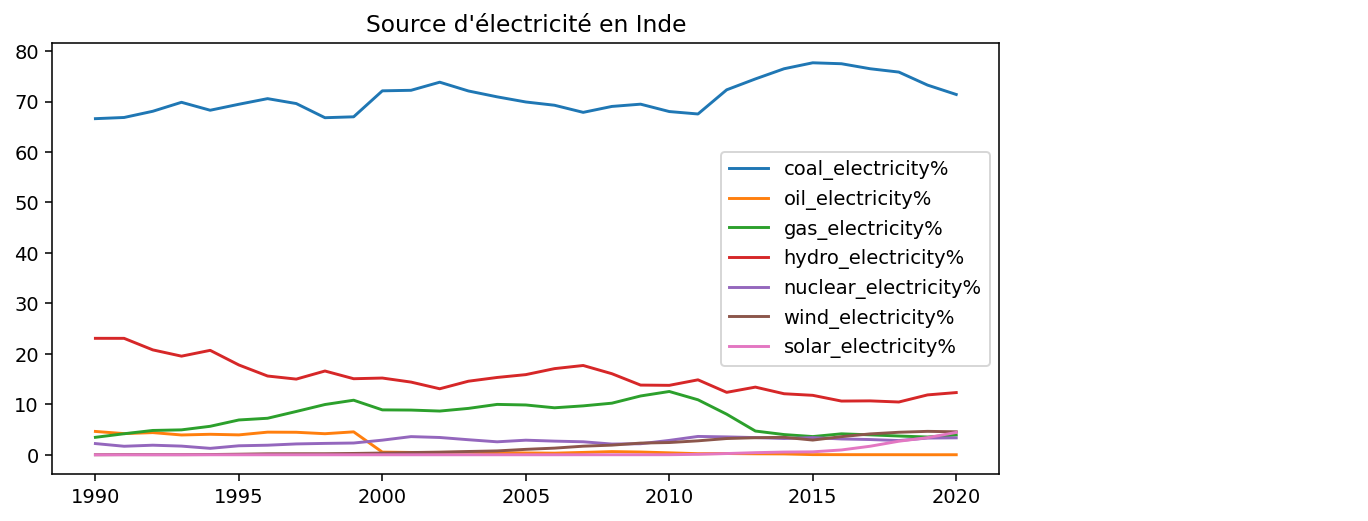

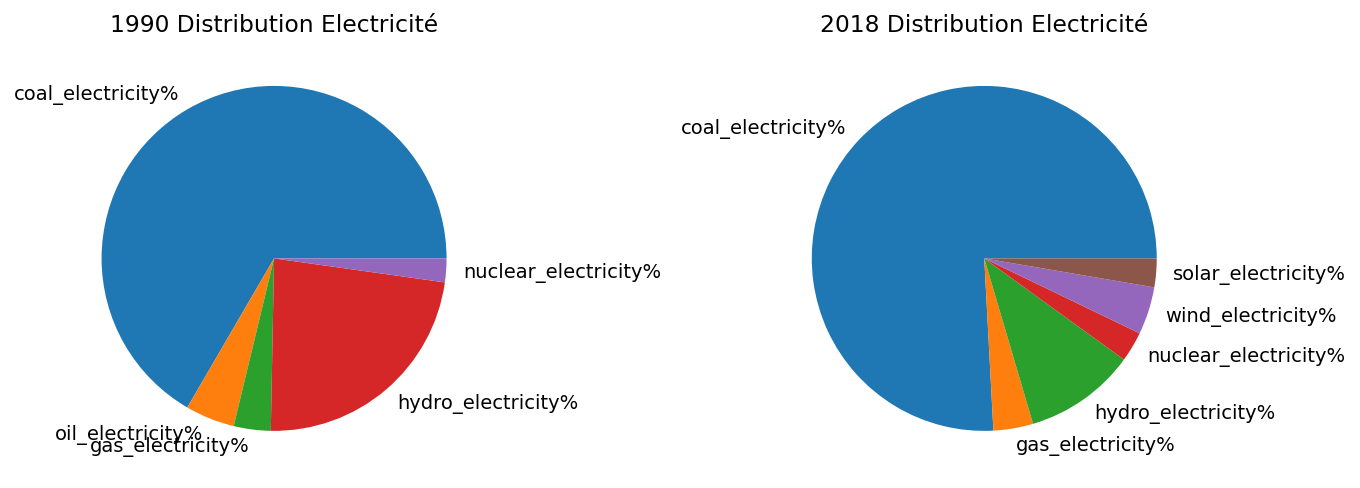

In [ ]:
Parse=['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
DF['total']=DF[Parse].sum(axis=1)
DF_Electricity=DF[['year','country']]
for i in Parse:
    DF_Electricity[f"{i}%"]=round(100*(DF[i]/DF['total']),4)

fig, ax = plt.subplots(1, 2, figsize=(12, 4),gridspec_kw={'width_ratios':[4,1]})
chart_DF=DF_Electricity[DF_Electricity['country']=='India'].groupby('year').mean()
ax[0].plot(chart_DF,label=chart_DF.columns)
ax[0].set_title("Source d'électricité en Inde")
ax[0].legend()
ax[1].axis('off')


years=[1990,2020]
count=0
fig2,ay =  plt.subplots(1, 2, figsize=(12, 4))
for y in years:
    chart_DF_pie_1=chart_DF[(chart_DF.index.values==y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i]<1:
            chart_DF_pie_1.drop(columns=[i],axis=1,inplace=True)
    ay[count].pie(chart_DF_pie_1.iloc[0].values,labels=chart_DF_pie_1.columns)
    ay[count].set_title(f"{int(y)} Distribution Electricité")
    count=count+1

plt.show()